In [1]:
import pandas as pd
import os, sys
import numpy as np

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../..')))

from utils.prediction_utils import *

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

import xgboost as xgb

random_seed = 42

In [2]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling"
X, y = get_data("conv2d", base_dir, sample_rate=1.0)
X.info()

34it [00:19,  1.11it/s]

< 0 found in file time.32.1024.0.csv


44it [00:26,  1.17it/s]

< 0 found in file time.128.512.0.csv


46it [00:27,  1.64it/s]

< 0 found in file time.128.1024.0.csv


54it [00:32,  1.30it/s]

< 0 found in file time.512.128.0.csv


56it [00:33,  1.76it/s]

< 0 found in file time.512.512.0.csv


58it [00:33,  2.12it/s]

< 0 found in file time.512.1024.0.csv
< 0 found in file time.512.1024.1.csv


64it [00:35,  2.51it/s]

< 0 found in file time.1024.32.0.csv


66it [00:36,  2.76it/s]

< 0 found in file time.1024.128.0.csv


72it [00:37,  1.94it/s]
/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling/utils/time_utils.py:297: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfs = pd.concat(dfs, axis=0, ignore_index=True)


< 0 found in file time.1024.512.0.csv
< 0 found in file time.1024.512.1.csv
< 0 found in file time.1024.1024.0.csv
< 0 found in file time.1024.1024.1.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456435 entries, 0 to 456434
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   b             456435 non-null  int64  
 1   in_channels   456435 non-null  int64  
 2   iH            456435 non-null  int64  
 3   iW            456435 non-null  int64  
 4   out_channels  456435 non-null  int64  
 5   groups        456435 non-null  int64  
 6   kH            456435 non-null  int64  
 7   kW            456435 non-null  int64  
 8   stride        456435 non-null  int64  
 9   dilation      456435 non-null  int64  
 10  gflops        456435 non-null  float64
 11  dtype_16      456435 non-null  bool   
 12  dtype_32      456435 non-null  bool   
 13  dtype_b16     456435 non-null  bool   
 14  transposed_0  456435 non-n

In [3]:
df = pd.concat([X, y], axis=1)
df = df.query("time > 0").dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454770 entries, 0 to 456434
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   b             454770 non-null  int64  
 1   in_channels   454770 non-null  int64  
 2   iH            454770 non-null  int64  
 3   iW            454770 non-null  int64  
 4   out_channels  454770 non-null  int64  
 5   groups        454770 non-null  int64  
 6   kH            454770 non-null  int64  
 7   kW            454770 non-null  int64  
 8   stride        454770 non-null  int64  
 9   dilation      454770 non-null  int64  
 10  gflops        454770 non-null  float64
 11  dtype_16      454770 non-null  bool   
 12  dtype_32      454770 non-null  bool   
 13  dtype_b16     454770 non-null  bool   
 14  transposed_0  454770 non-null  bool   
 15  transposed_1  454770 non-null  bool   
 16  time          454770 non-null  float64
dtypes: bool(5), float64(2), int64(10)
memory usage: 47.3 

In [9]:
"""
b, iH, iW, groups, kH, kW all have a few parameters.
"""
columns_to_encode = ["b", "iH", "iW", "groups", "kH", "kW"]
df = pd.get_dummies(df, columns=columns_to_encode)

In [11]:
X, y = df.drop(["time"], axis=1), df["time"]
X_train, X_val, X_test, y_train, y_val, y_test = get_train_test_split(X, y, return_concat=False)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318339 entries, 267849 to 121958
Data columns (total 37 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   in_channels   318339 non-null  int64  
 1   out_channels  318339 non-null  int64  
 2   stride        318339 non-null  int64  
 3   dilation      318339 non-null  int64  
 4   gflops        318339 non-null  float64
 5   dtype_16      318339 non-null  bool   
 6   dtype_32      318339 non-null  bool   
 7   dtype_b16     318339 non-null  bool   
 8   transposed_0  318339 non-null  bool   
 9   transposed_1  318339 non-null  bool   
 10  b_2           318339 non-null  bool   
 11  b_4           318339 non-null  bool   
 12  b_8           318339 non-null  bool   
 13  b_16          318339 non-null  bool   
 14  b_32          318339 non-null  bool   
 15  iH_8          318339 non-null  bool   
 16  iH_32         318339 non-null  bool   
 17  iH_128        318339 non-null  bool   
 18  iH_5

# Fitting

Train--------
Mean Squared Error: 8750.473135592994
MAPE: 0.041057201768335445
R-squared: 0.9713756406658335


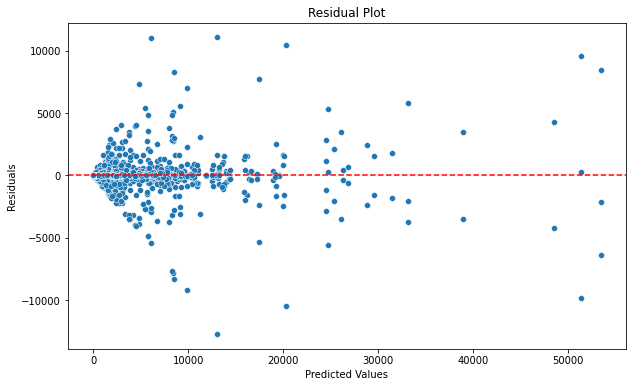

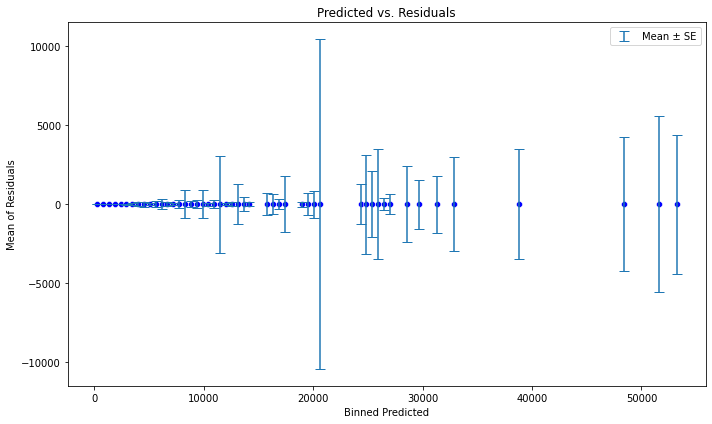

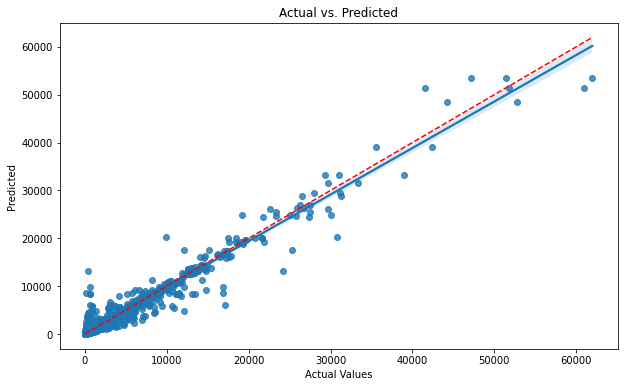

Val--------
Mean Squared Error: 30605.464900947398
MAPE: 0.14458690421548404
R-squared: 0.8669982828421208


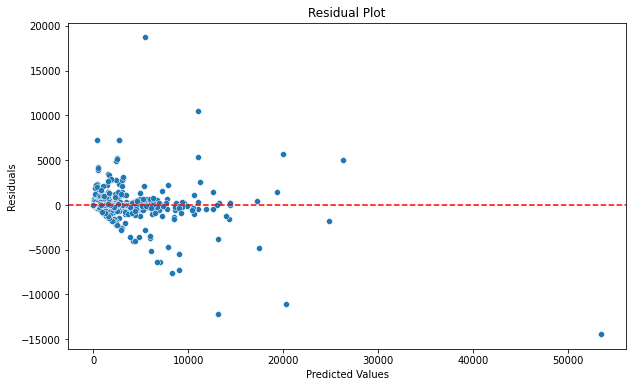

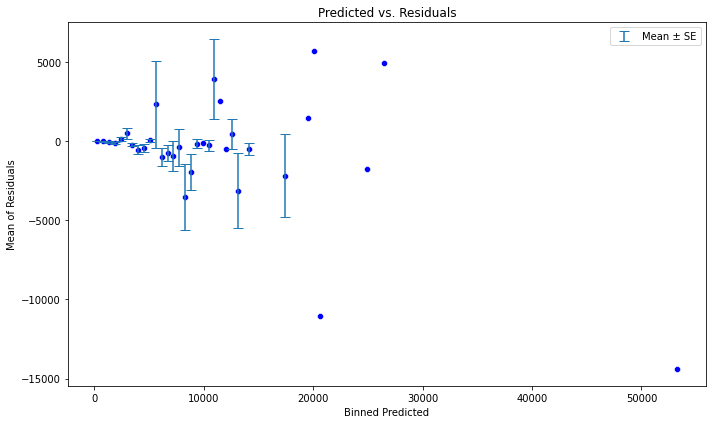

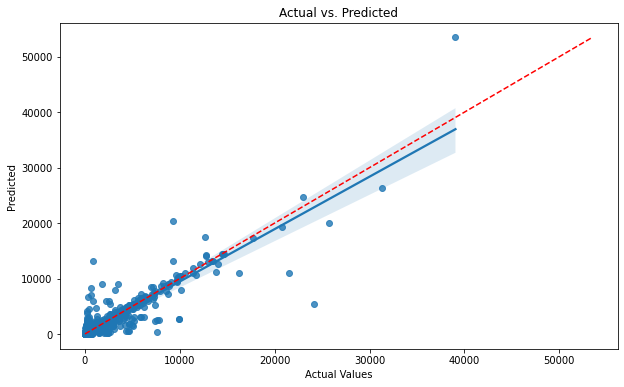

In [12]:
tree_model = DecisionTreeRegressor(max_depth=40, min_samples_split=2, min_samples_leaf=2, max_features=100, random_state=random_seed)
tree_model.fit(X_train, y_train)

y_hat_train = tree_model.predict(X_train)
y_hat_val = tree_model.predict(X_val)

y_train_res = y_hat_train - y_train

print("Train--------")
get_r2_score(y_train, y_hat_train)
plot_residuals(y_train, y_hat_train)
plot_residuals(y_train, y_hat_train, bins=100)
plot_actual_vs_pred(y_train, y_hat_train)

print("Val--------")
get_r2_score(y_val, y_hat_val)
plot_residuals(y_val, y_hat_val)
plot_residuals(y_val, y_hat_val, bins=100)
plot_actual_vs_pred(y_val, y_hat_val)

In [13]:
feature_importances = tree_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

features_df = features_df.sort_values(by='Importance', ascending=False)
features_df

,Feature,Importance
4,gflops,0.341816
25,groups_1,0.098742
0,in_channels,0.090776
30,groups_1024,0.070733
14,b_32,0.064282
5,dtype_16,0.063517
29,groups_512,0.050474
31,kH_3,0.042508
34,kW_3,0.041936
23,iW_512,0.036857


## Random Forest

In [14]:
tree_model = RandomForestRegressor(n_estimators=30, max_depth=25, random_state=random_seed)
tree_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, n_estimators=30, random_state=42)

Train--------
Mean Squared Error: 5990.065367348303
MAPE: 0.07870773145178485
R-squared: 0.980405427129112


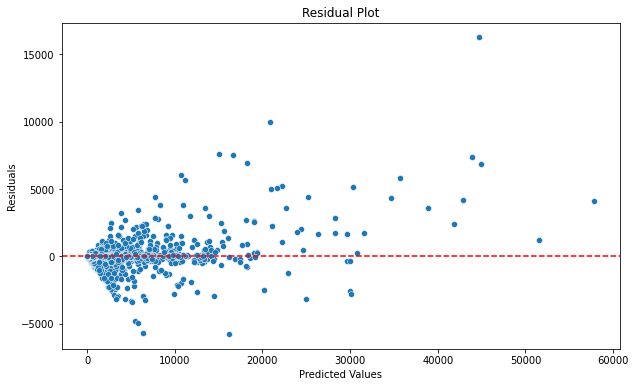

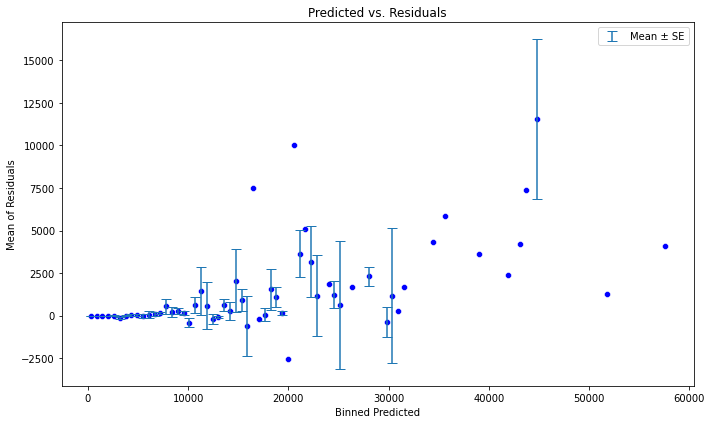

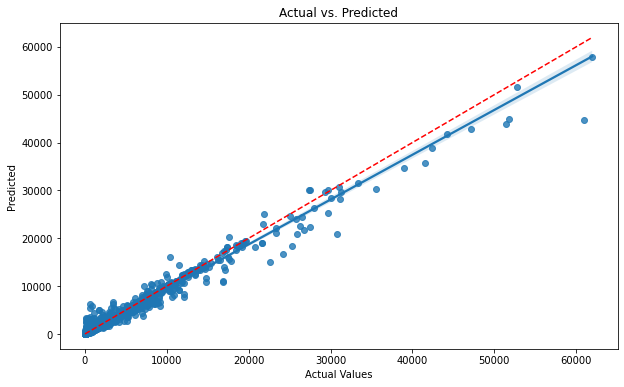

Val--------
Mean Squared Error: 23321.592993362792
MAPE: 0.162367254362979
R-squared: 0.8986516974986909


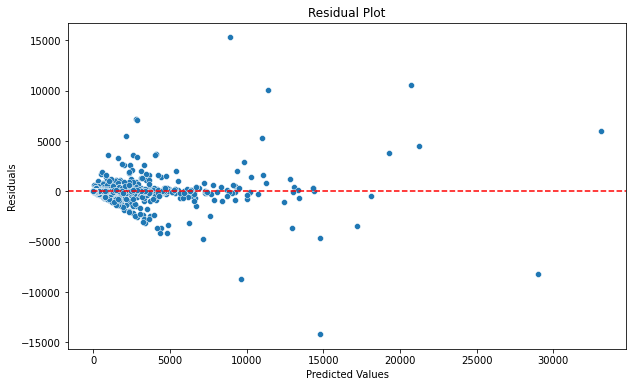

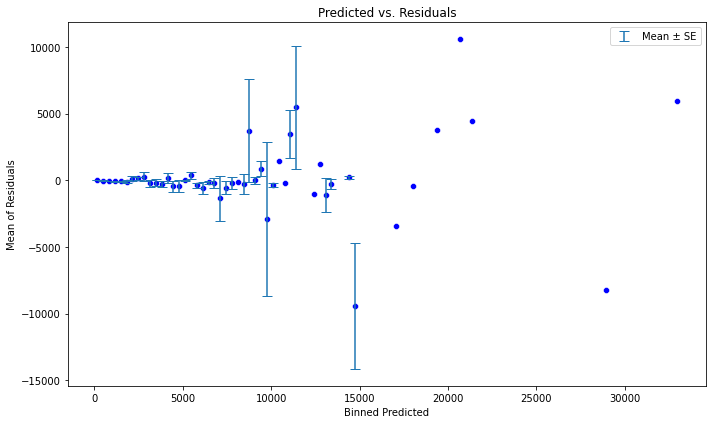

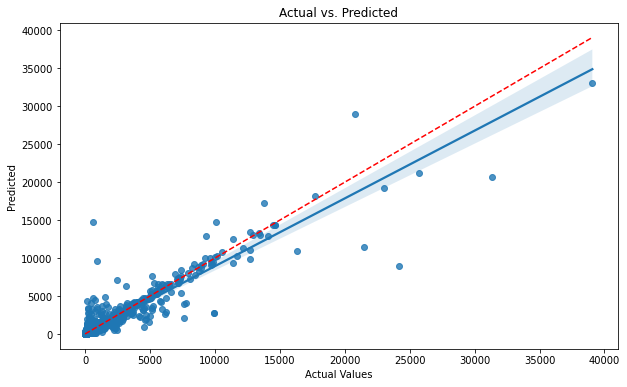

In [15]:
y_hat_train = tree_model.predict(X_train)
y_hat_val = tree_model.predict(X_val)

print("Train--------")
get_r2_score(y_train, y_hat_train)
plot_residuals(y_train, y_hat_train)
plot_residuals(y_train, y_hat_train, bins=100)
plot_actual_vs_pred(y_train, y_hat_train)

print("Val--------")
get_r2_score(y_val, y_hat_val)
plot_residuals(y_val, y_hat_val)
plot_residuals(y_val, y_hat_val, bins=100)
plot_actual_vs_pred(y_val, y_hat_val)

In [16]:
feature_importances = tree_model.feature_importances_
features_df = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": feature_importances}
)

features_df = features_df.sort_values(by="Importance", ascending=False)
features_df

,Feature,Importance
4,gflops,0.362747
25,groups_1,0.096082
30,groups_1024,0.065484
14,b_32,0.058908
1,out_channels,0.057898
0,in_channels,0.052013
5,dtype_16,0.050205
29,groups_512,0.048081
34,kW_3,0.037031
6,dtype_32,0.036894
